# Quality features
This notebook will explore the features of quality, including clarity, contrast, angle, and portion visible. The distribution of each feature will be modeled to gain a better understanding of the overall distribution of quality.

In [2]:
!nvidia-smi

Thu Aug 15 19:21:15 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.28.03              Driver Version: 560.28.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-SXM2-32GB           On  |   00000000:3A:00.0 Off |                    0 |
| N/A   31C    P0             55W /  300W |   31492MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cols = ["species","image","focus_clarity", "contrast", "angle", "portion_visible"]
labels1 = pd.read_csv('pifsc_labels_detail.csv')[cols]

cols = ["species","filename","focus_clarity", "contrast", "angle", "portion_visible"]
labels2 = pd.read_csv('pifsc_labels2.csv')[cols]
labels2.columns = ["species","image","focus_clarity", "contrast", "angle", "portion_visible"]

labels = pd.concat([labels1, labels2]).reset_index(drop=True)

In [5]:
is_na_fc = labels.focus_clarity.isna()
is_na_co = labels.contrast.isna()
is_na_an = labels.angle.isna()
is_na_pv = labels.portion_visible.isna()
labels = labels.loc[~is_na_fc]
labels = labels.loc[~is_na_co]
labels = labels.loc[~is_na_an]
labels = labels.loc[~is_na_pv]
labels = labels.drop_duplicates(subset='image', keep='first')
len(labels)

2696

In [14]:
labels.focus_clarity.value_counts()

focus_clarity
4.0    1420
2.0     775
9.0     501
Name: count, dtype: int64

focus_clarity
2.0     775
4.0    1420
9.0     501
Name: count, dtype: int64
contrast
1.0    1475
2.0       1
3.0    1217
8.0       3
Name: count, dtype: int64
angle
1.0    2512
2.0     165
3.0       1
4.0       1
8.0      17
Name: count, dtype: int64
portion_visible
1.0    1311
2.0       1
3.0     709
5.0     206
8.0     468
9.0       1
Name: count, dtype: int64


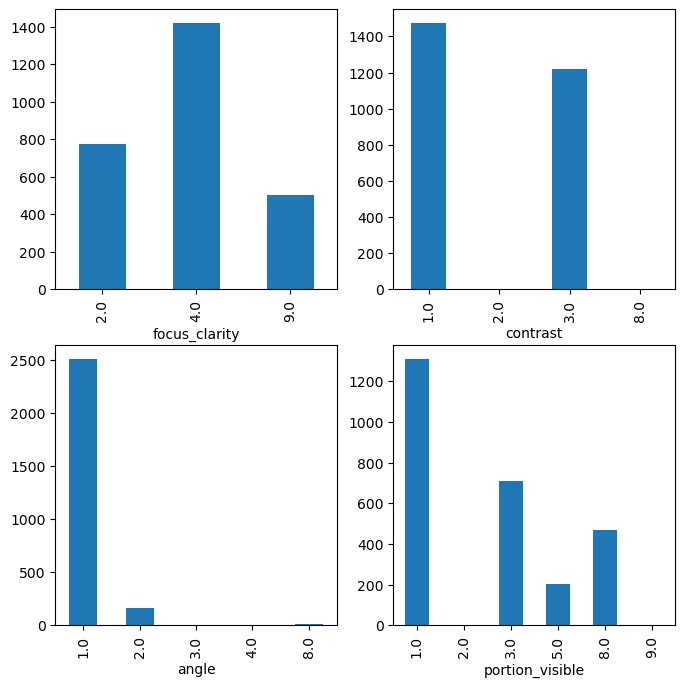

In [27]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
for i, ax in zip(["focus_clarity", "contrast", "angle", "portion_visible"], axes.flatten()):
    value_counts = labels[i].value_counts()
    value_counts.index = pd.to_numeric(value_counts.index)
    value_counts = value_counts.sort_index()
    print(value_counts)
    value_counts.plot(kind='bar',ax=ax)